### Data Analysis and Visualization

##### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

##### Reading Dataset

In [2]:
data = pd.read_csv("online_shoppers_intention.csv")

In [3]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
data.shape

(12330, 18)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

##### Univariate Analysis

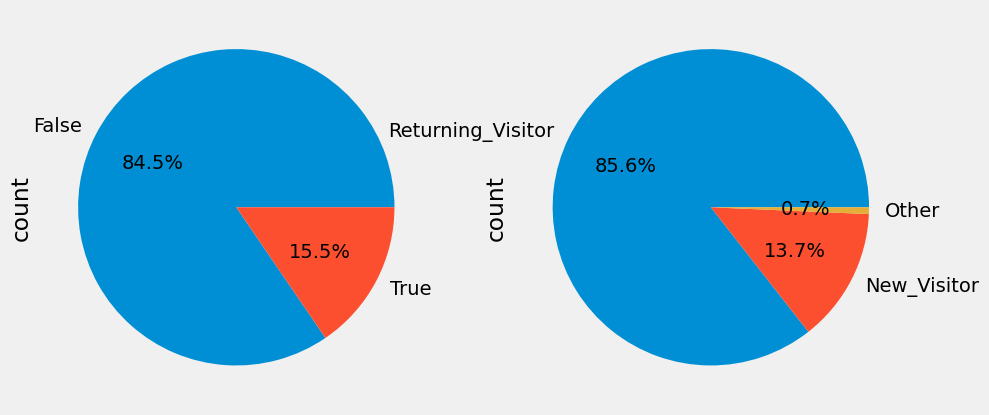

In [6]:
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
data["Revenue"].value_counts().plot(kind="pie",autopct="%0.1f%%")

plt.subplot(1,2,2)
data["VisitorType"].value_counts().plot(kind="pie",autopct="%0.1f%%")
plt.show()

Inference : We can observe that 84.5% of the visitors didn't shop while 85.6% will return again

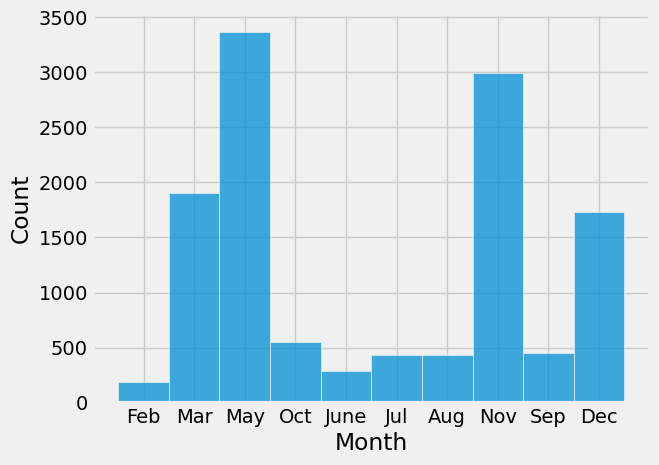

In [7]:
sns.histplot(data["Month"])
plt.show()

Inference : The visitors are high in May and November months.

##### Bivariate analysis

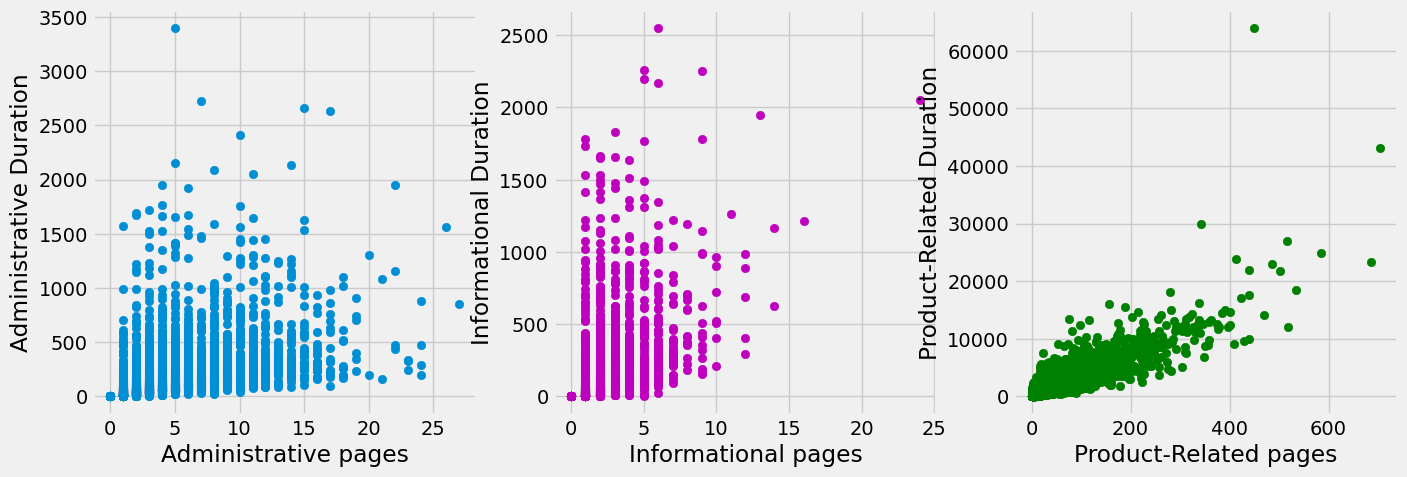

In [8]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.xlabel("Administrative pages")
plt.ylabel("Administrative Duration")
plt.scatter(data["Administrative"],data["Administrative_Duration"])


plt.subplot(1,3,2)
plt.xlabel("Informational pages")
plt.ylabel("Informational Duration")
plt.scatter(data["Informational"],data["Informational_Duration"],color="m")

plt.subplot(1,3,3)
plt.xlabel("Product-Related pages")
plt.ylabel("Product-Related Duration")
plt.scatter(data["ProductRelated"],data["ProductRelated_Duration"],color="g")

plt.show()

Inference : 1 - We can observe administarative duration mostly lies in between 0 to 1000 and the pages visited between 0-10 mostly.

2 - whereas in informational we can the duration is concentrated more between 0 to 1000 and pages visited is between 0 to 10

3 - In the case of product related we can see that the duration is mostly between 0 to 10000 and pages are like 0 to 400 mostly

In [9]:
pd.crosstab(data["SpecialDay"],data["Revenue"])

Revenue,False,True
SpecialDay,,
0.0,9248,1831
0.2,164,14
0.4,230,13
0.6,322,29
0.8,314,11
1.0,144,10


Inference : When special event <0.6 then less revenue is generated compared to >0.6 . But overall the revenue generated is higher on normal days

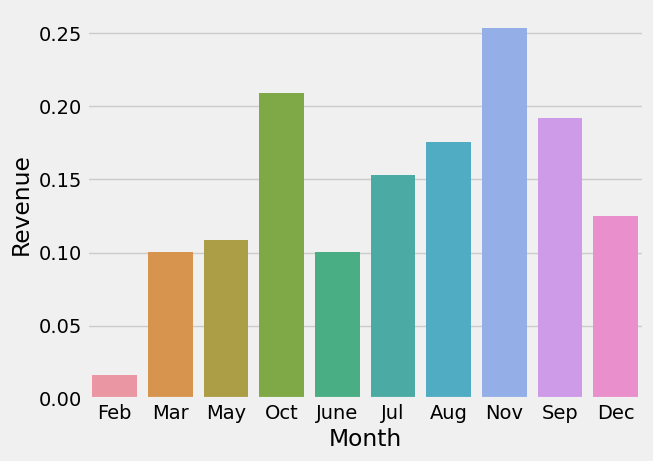

In [10]:
sns.barplot(x="Month",y="Revenue",data=data,ci=False)
plt.show()

Inference : High revenue is generated in November, October, September, August months compared to others

### Multivariate Analysis

In [11]:
pd.crosstab([data["Month"],data["VisitorType"]],data["Revenue"])

Revenue                  False  True 
Month VisitorType                    
Aug   New_Visitor           51     21
      Returning_Visitor    306     55
Dec   New_Visitor          260     75
      Other                 49     13
      Returning_Visitor   1202    128
Feb   New_Visitor            1      0
      Returning_Visitor    180      3
Jul   New_Visitor           43     11
      Returning_Visitor    323     55
June  New_Visitor           23      7
      Other                  1      0
      Returning_Visitor    235     22
Mar   New_Visitor          196     36
      Returning_Visitor   1519    156
May   New_Visitor          231     88
      Returning_Visitor   2768    277
Nov   New_Visitor          291    128
      Other                 19      3
      Returning_Visitor   1928    629
Oct   New_Visitor           96     28
      Returning_Visitor    338     87
Sep   New_Visitor           80     28
      Returning_Visitor    282     58

<Axes: >

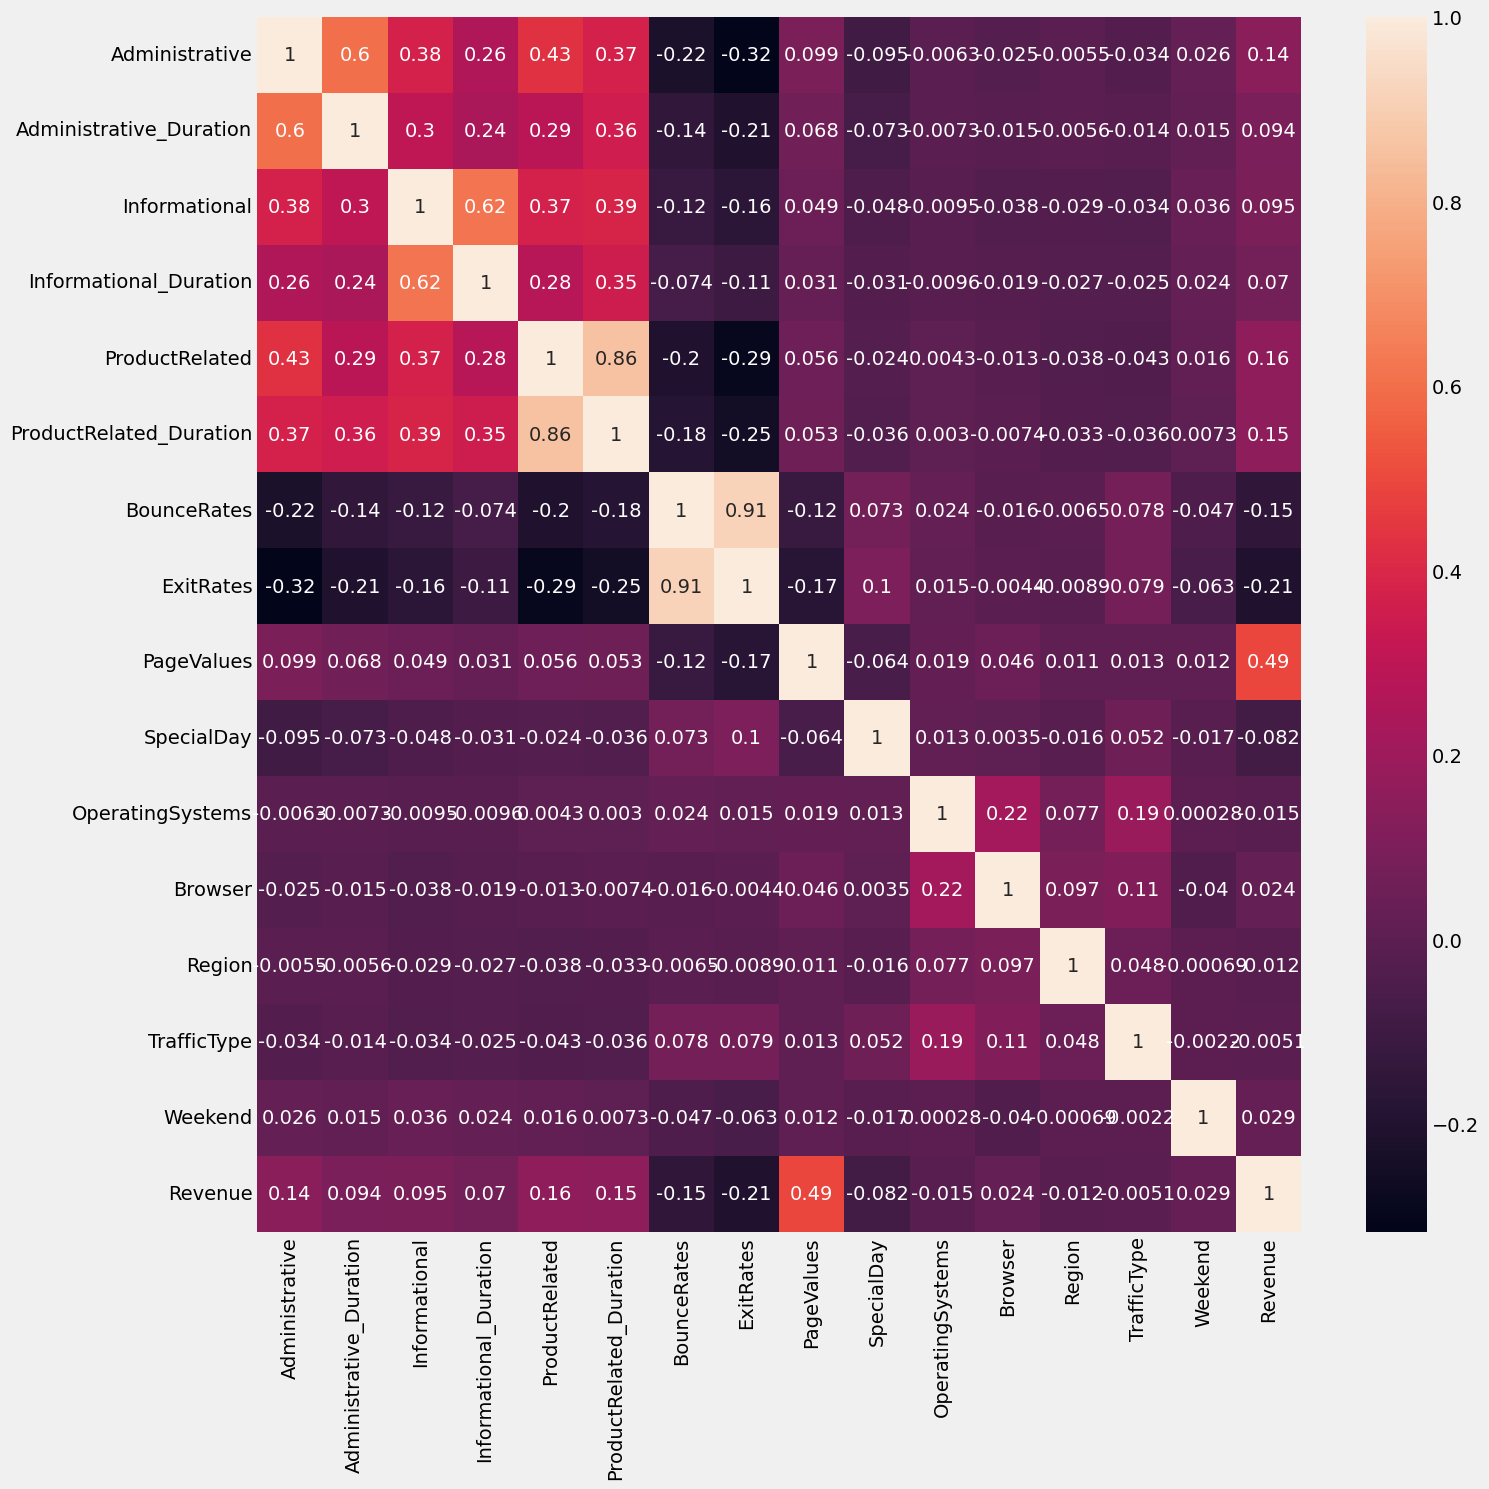

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(numeric_only=True),annot=True)

##### Descriptive Analysis

In [13]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


### Data preprocessing

#### Handling Null values if any

In [14]:
data.isnull().any()

Administrative             False
Administrative_Duration    False
Informational              False
Informational_Duration     False
ProductRelated             False
ProductRelated_Duration    False
BounceRates                False
ExitRates                  False
PageValues                 False
SpecialDay                 False
Month                      False
OperatingSystems           False
Browser                    False
Region                     False
TrafficType                False
VisitorType                False
Weekend                    False
Revenue                    False
dtype: bool

In [15]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

#### Handling categorical values -- Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()

In [19]:
data["Month"] = le.fit_transform(data["Month"])
data["VisitorType"] = le.fit_transform(data["VisitorType"])
data["Weekend"] = le.fit_transform(data["Weekend"])
data["Revenue"] = le.fit_transform(data["Revenue"])

#### Dropping unwanted features -- Kmeans(unsupervised) so target feature must be removed

In [20]:
data_k = data.drop("Revenue",axis=1)

#### Feature Scaling/Normalization

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
sc = MinMaxScaler()

In [25]:
data_k1 = sc.fit_transform(data_k)

In [26]:
data_k = pd.DataFrame(data_k1,columns=data_k.columns)
data_k.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,0.222222,0.000000,0.000000,0.000,0.000000,1.0,0.0
1,0.0,0.0,0.0,0.0,0.002837,0.001000,0.00,0.50,0.0,0.0,0.222222,0.142857,0.083333,0.000,0.052632,1.0,0.0
2,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,0.222222,0.428571,0.000000,1.000,0.105263,1.0,0.0
3,0.0,0.0,0.0,0.0,0.002837,0.000042,0.25,0.70,0.0,0.0,0.222222,0.285714,0.083333,0.125,0.157895,1.0,0.0
4,0.0,0.0,0.0,0.0,0.014184,0.009809,0.10,0.25,0.0,0.0,0.222222,0.285714,0.166667,0.000,0.157895,1.0,1.0


## Model Building

### Unsupervised ML - KMeans

#### Elbow method

In [27]:
from sklearn.cluster import KMeans

In [28]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init="k-means++",random_state=0)
    kmeans.fit(data_k)
    wcss.append(kmeans.inertia_)

In [29]:
wcss

[8977.629530570663,
 6768.013937146531,
 5619.938835283879,
 4638.301369734074,
 4168.6227043885165,
 3772.7265711164623,
 3448.429181308778,
 3265.653818947029,
 3063.6332599195084,
 2947.5021436527895]

Text(0.5, 1.0, 'k vs wcss')

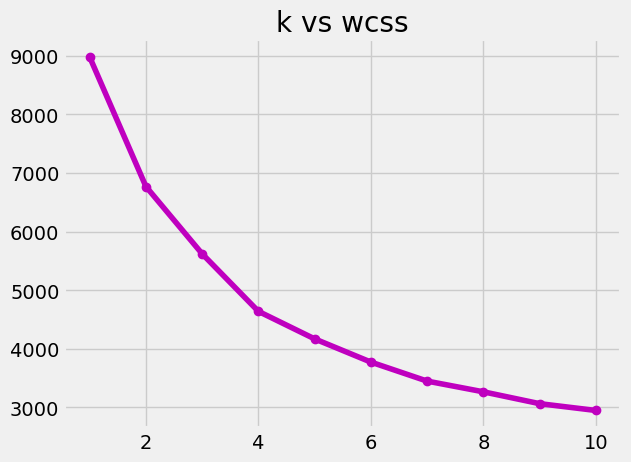

In [30]:
k=list(range(1,11))
plt.plot(k,wcss,"m-o")
plt.title("k vs wcss")

#### Initializing the model

In [31]:
km = KMeans(n_clusters=4,init="k-means++",random_state=0)

In [32]:
y_pred_km = km.fit_predict(data_k)

#### Dimensionality Reduction using Principal Component Analysis

In [33]:
from sklearn.decomposition import PCA

In [34]:
pca = PCA(n_components=2)
dfPCA = pca.fit_transform(data_k)
dfPCA

array([[-0.44925111,  0.80069767],
       [-0.28170419,  0.14437366],
       [-0.44574738,  0.7319541 ],
       ...,
       [ 0.66593704,  0.54944342],
       [-0.21694675, -0.03510954],
       [ 0.87942437, -0.43152569]])

In [35]:
dfPCA = pd.DataFrame(dfPCA,columns=["PCA 1","PCA 2"])
dfPCA.head()

,PCA 1,PCA 2
0,-0.449251,0.800698
1,-0.281704,0.144374
2,-0.445747,0.731954
3,-0.333652,0.338048
4,0.709525,0.299958


In [36]:
dfPCA["Cluster"] = y_pred_km

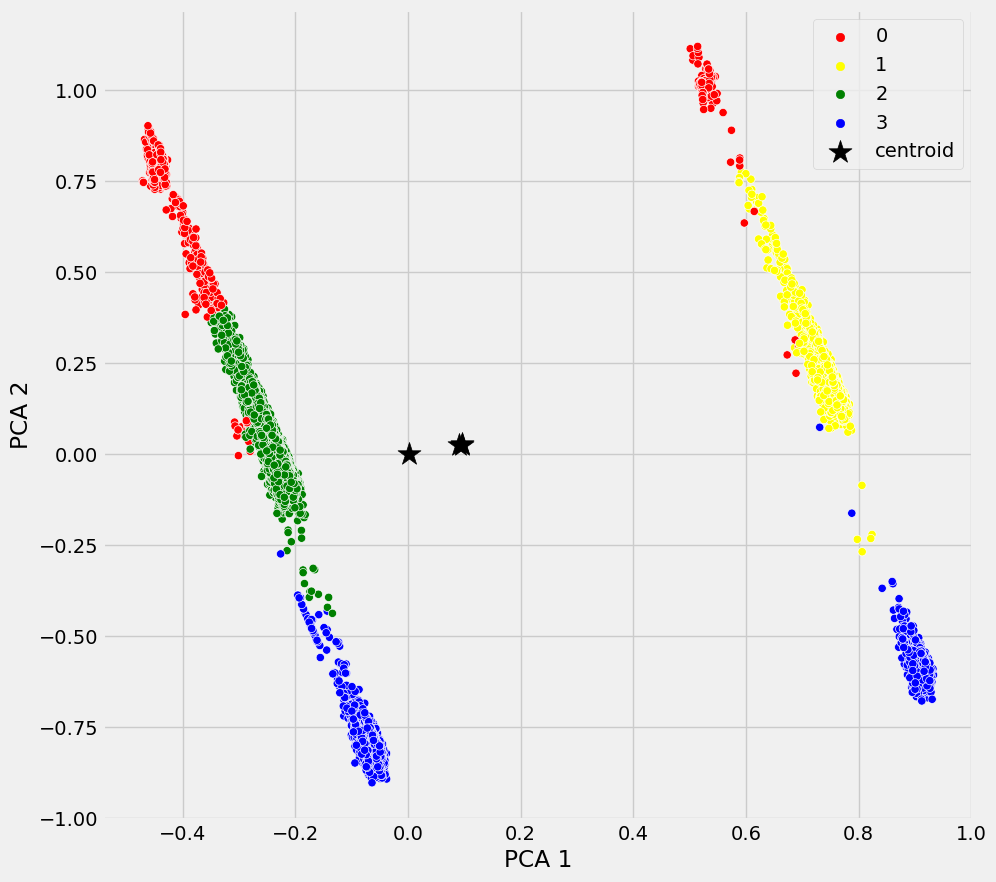

In [37]:
#Visualizing data points using seaborn

plt.figure(figsize=(10,10))
sns.scatterplot(x="PCA 1",y="PCA 2",hue = dfPCA["Cluster"],palette=["red","yellow","green","blue"],data=dfPCA)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="black",s=300,marker="*",label="centroid")
plt.legend()

### Supervised ML

In [38]:
#Splitting dataset
from sklearn.model_selection import train_test_split

x = data.drop("Revenue",axis=1)
y = data["Revenue"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
def logisticReg(x_train,x_test,y_train,y_test):
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    yPred = lr.predict(x_test)
    print("Logistic Regression : ")
    print("Confusion matrix")
    print(confusion_matrix(y_test,yPred))
    print("Classification Report : ")
    print(classification_report(y_test,yPred))
    

In [41]:
logisticReg(x_train,x_test,y_train,y_test)

Logistic Regression : 
Confusion matrix
[[3033   82]
 [ 368  216]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      3115
           1       0.72      0.37      0.49       584

    accuracy                           0.88      3699
   macro avg       0.81      0.67      0.71      3699
weighted avg       0.87      0.88      0.86      3699



In [42]:
def randomForest(x_train,x_test,y_train,y_test):
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    yPred = rf.predict(x_test)
    print("RandomForestClassifier : ")
    print("Confusion matrix")
    print(confusion_matrix(y_test,yPred))
    print("Classification report")
    print(classification_report(y_test,yPred))
    return rf

In [43]:
rf=randomForest(x_train,x_test,y_train,y_test)

RandomForestClassifier : 
Confusion matrix
[[3008  107]
 [ 266  318]]
Classification report
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      3115
           1       0.75      0.54      0.63       584

    accuracy                           0.90      3699
   macro avg       0.83      0.76      0.79      3699
weighted avg       0.89      0.90      0.89      3699



### Hyperparameter Tuning

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [46]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}


### Cross Validation

In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
cv_scores = cross_val_score(rf, x_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)

Cross-Validation Scores: [0.91372322 0.90614137 0.900927   0.9032445  0.89687138]


### Saving the model